# Google Play Store App Analytics with Plotly

Have you ever thought about building your own iOS or Android app? If so, then you probably have wondered about how things work in the app stores. Today we'll replicate some of the app store analytics provided by companies like App Annie or Sensor Tower that help inform development and app marketing strategies for many companies. This stuff is **BIG business!**

## Project Overview

In this module, we will compare thousands of apps in the Google Play Store to gain insight into:

- How competitive different app categories (e.g., Games, Lifestyle, Weather) are
- Which app category offers compelling opportunities based on its popularity
- How many downloads you would give up by making your app paid vs. free
- How much you can reasonably charge for a paid app
- Which paid apps have had the highest revenue
- How many paid apps will recoup their development costs based on their sales revenue

---

## Learning Objectives

Today you'll learn how to:

- Quickly remove duplicates from datasets
- Remove unwanted symbols and convert data into a numeric format
- Wrangle columns containing nested data with Pandas
- Create compelling data visualizations with the Plotly library, including:
  - Vertical, horizontal, and grouped bar charts
  - Pie and donut charts for categorical data
  - Use color scales to make beautiful scatter plots

## About the Dataset of Google Play Store Apps & Reviews
**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Introduction
## Import Statements

In [1]:
import pandas as pd


## Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

## Read the Dataset

In [3]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [4]:
df_apps.shape

(10841, 12)

In [5]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

The `.sample(n)` method will give us _n_ random rows. This is another handy way to inspect our DataFrame.

In [6]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
3542,FN Cam,PHOTOGRAPHY,3.40,181,10.00,"10,000",Free,0,Everyone,Photography,"January 13, 2016",4.0.3 and up
10178,Verizon Cloud,PRODUCTIVITY,4.30,185632,4.00,"50,000,000",Free,0,Everyone,Productivity,"July 18, 2018",4.4 and up
10304,"Sweet Selfie - selfie camera, beauty cam, phot...",PHOTOGRAPHY,4.60,1159058,25.00,"100,000,000",Free,0,Everyone,Photography,"August 3, 2018",4.0.3 and up
9528,Smart Keyboard Trial,TOOLS,4.10,65597,2.40,"10,000,000",Free,0,Everyone,Tools,"April 28, 2017",2.3 and up
4020,Armani Exchange Connected,LIFESTYLE,4.10,305,44.00,"10,000",Free,0,Everyone,Lifestyle,"July 4, 2017",4.4 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [7]:
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [8]:
df_apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [9]:
df_apps_clean = df_apps.dropna()

In [10]:
# Check if there is any nan value
df_apps_clean.isna().values.any()

np.False_

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [11]:
df_apps_clean.duplicated().sum()

np.int64(476)

In [12]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [13]:
df_apps_clean = df_apps_clean.drop_duplicates()

In [14]:
df_apps_clean.duplicated().values.any()

np.False_

In [15]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


To get rid of duplicates, just calling `.drop_duplicates()` is not enough since duplicates may differ in some columns like reviews count. We need to specify which columns define duplicates. For example:

In [16]:
df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Category', 'Rating'])
df_apps_clean.shape

(8290, 10)

This leaves us with 8,190 entries after removing duplicates. Huzzah! 💪

---

**What else should I know about the data?**

- The data originally contained 13 different features scraped from the Google Play Store.
- This dataset is a sample of Android apps, not the full store (which has millions).
- The sample might not be perfectly representative because the data was scraped based on geographical location and user behavior of the scraper (Lavanya Gupta).
- The data was compiled around 2017/2018; pricing reflects USD at that time but may have changed since.
- App size was converted to a floating-point number in MBs; missing sizes were replaced with the category average.
- Install counts are approximations; Google reports installs in magnitude ranges (e.g., 100,000+), but this was cleaned to the exact number by removing '+'.

---

# Preliminary Exploration 
## Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [17]:
df_apps_clean[df_apps_clean.Rating == 5].head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical


We observe that only apps with very few reviews (and a low number of installs) have perfect 5-star ratings, likely due to biased ratings from friends or family. This shows a problem in relying solely on ratings to assess app quality.

## Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [18]:
df_apps_clean.sort_values(by='Size_MBs', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1795,Navi Radiography Pro,MEDICAL,4.70,11,100.00,500,Paid,$15.99,Everyone,Medical
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
9945,Ultimate Tennis,SPORTS,4.30,183004,100.00,"10,000,000",Free,0,Everyone,Sports
8718,Mini Golf King - Multiplayer Game,GAME,4.50,531458,100.00,"5,000,000",Free,0,Everyone,Sports
8719,Draft Simulator for FUT 18,SPORTS,4.60,162933,100.00,"5,000,000",Free,0,Everyone,Sports


Here, we clearly see an upper bound around 100 MB for app size. Many apps hit this 100 MB limit exactly. This corresponds to a limit imposed by the Google Play Store, indicating developers cannot make apps arbitrarily large.

## Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [19]:
df_apps_clean.sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [20]:
# Are there any paid apps among the top 50?
top_50_review = df_apps_clean.sort_values(by='Reviews', ascending=False).head(50)
top_50_review[top_50_review.Type == 'Paid']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


This identifies the most popular apps in the Android Play Store, including familiar names like Facebook, WhatsApp, Instagram, etc. Interestingly, none of the top 50 most reviewed apps are paid apps.

# Data Visualisation with Plotly
Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

## Create Pie and Donut Charts

All Android apps have a content rating like “Everyone,” “Teen,” or “Mature 17+.” Let’s take a look at the distribution of content ratings in our dataset and learn how to visualize it with [plotly](https://plotly.com/python/) — a powerful and popular data visualization library that can be used alongside or instead of Matplotlib.

### Step 1: Count Occurrences of Each Content Rating

We start by counting the number of occurrences for each content rating using `.value_counts()`:

In [27]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Content_Rating
Everyone           6677
Teen                933
Mature 17+          357
Everyone 10+        319
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

### Step 2: Import plotly.express

The quickest way to create beautiful charts with plotly is by importing `plotly.express`:

In [22]:
import plotly.express as px

### Step 3: Create a Pie Chart

To create a pie chart, call `px.pie()` and then `.show()` the figure. Plotly refers to all figures (line charts, bar charts, pie charts, etc.) as *graph_objects*. Here’s how to create a basic pie chart:

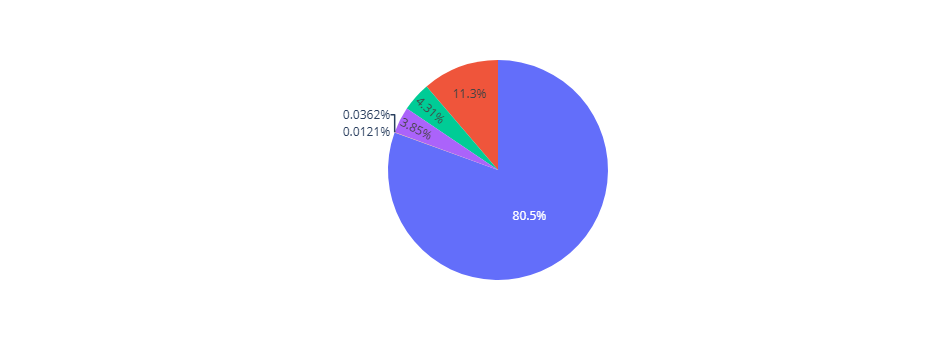

In [28]:
fig = px.pie(ratings.index, values=ratings.values)  # Create a graph object
fig.show()

---
Let’s customise our pie chart. Looking at the [.pie()](https://plotly.com/python-api-reference/generated/plotly.express.pie.html) documentation we see a number of parameters that we can set, like title or names.

If you’d like to configure other aspects of the chart, that you can’t see in the list of parameters, you can call a method called `.update_traces()`. In plotly lingo, “traces” refer to graphical marks on a figure. Think of “traces” as collections of attributes. Here we update the traces to change how the text is displayed.

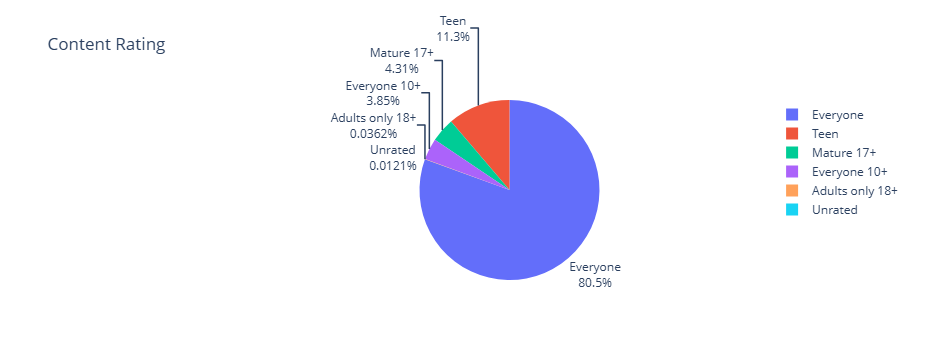

In [29]:
fig = px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

- `textposition='outside'` moves the labels outside the pie slices.
- `textinfo='percent+label'` shows both the percentage and the category label on the chart.

---

### Step 4: Create a Donut Chart

To create a donut (🍩) chart, add the `hole` argument to your pie chart specifying the hole size:

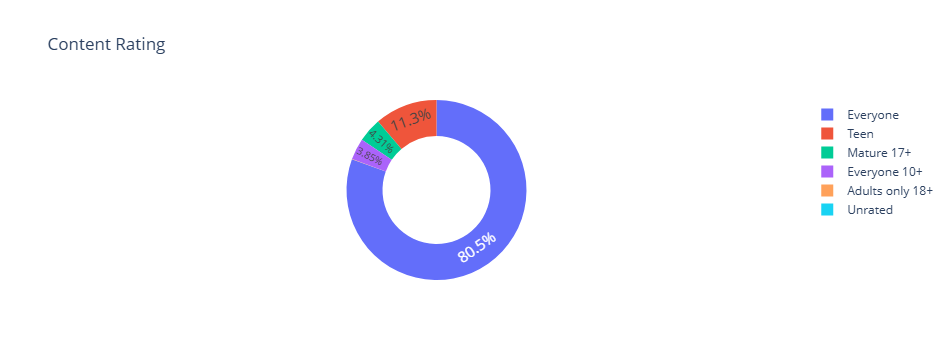

In [30]:
fig = px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
    hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

- `hole=0.6` creates a donut hole that is 60% of the chart radius.
- `textposition='inside'` places percentage labels inside the donut.
- `textfont_size=15` adjusts the font size of the labels.
- `textinfo='percent'` shows only the percentage text inside the donut.


# Numeric Type Conversions for the Installations & Price Data

### Challenge  
- How many apps have over 1 billion (BILLION) installations?  
- How many apps just have a single install?  
- Check the datatype of the Installs column.  
- Count the number of apps at each installation level.  
- Convert the Installs column to a numeric type (requires removing non-numeric characters).

**1. Check the datatype of the Installs column.**

In [34]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8290 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8290 non-null   object 
 1   Category        8290 non-null   object 
 2   Rating          8290 non-null   float64
 3   Reviews         8290 non-null   int64  
 4   Size_MBs        8290 non-null   float64
 5   Installs        8290 non-null   object 
 6   Type            8290 non-null   object 
 7   Price           8290 non-null   object 
 8   Content_Rating  8290 non-null   object 
 9   Genres          8290 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 712.4+ KB


**2. Count the number of apps at each level of installations.**

In [37]:
df_apps_clean.groupby(by='Installs').count()

,App,Category,Rating,Reviews,Size_MBs,Type,Price,Content_Rating,Genres
Installs,,,,,,,,,
1,3,3,3,3,3,3,3,3,3
"1,000",699,699,699,699,699,699,699,699,699
"1,000,000",1428,1428,1428,1428,1428,1428,1428,1428,1428
"1,000,000,000",21,21,21,21,21,21,21,21,21
10,69,69,69,69,69,69,69,69,69
"10,000",988,988,988,988,988,988,988,988,988
"10,000,000",963,963,963,963,963,963,963,963,963
100,303,303,303,303,303,303,303,303,303
"100,000",1098,1098,1098,1098,1098,1098,1098,1098,1098


**3. Convert the number of installations (the Installs column) to a numeric data type.**\
Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [49]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)

**4. How many apps had over 1 billion (that's right - BILLION) installations?**

In [50]:
df_apps_clean[df_apps_clean.Installs >= 1e9].shape

(21, 10)

**5. How many apps just had a single install?**

In [51]:
df_apps_clean[df_apps_clean.Installs == 1].shape

(3, 10)

In [48]:
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,699
5000,425
10000,988


In [72]:
# - To find apps with just one install:
df_apps_clean[df_apps_clean['Installs'] == 1]

,App,Category,Rating,Reviews,Size_MBs,Installs,Revenue_Estimate,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,0.00,Free,0.00,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,1.49,Paid,1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,0.99,Paid,0.99,Everyone,Arcade


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

In [58]:
# Convert the price column to numeric data. 
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)

### The most expensive apps sub $250

In [59]:
# Cinvestigate the top 20 most expensive apps in the dataset.
df_apps_clean.sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment


Many of these are "I am Rich" apps (costing \\$300+)-not meaningful for real analysis.
Remove all apps costing more than $250:

In [64]:
# Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.
index = df_apps_clean[df_apps_clean.Price >= 250].index
df_apps_clean.drop(index=index, axis=0, inplace=True)

### Highest Grossing Paid Apps (ballpark estimate)
Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. 
- What are the top 10 highest grossing paid apps according to this estimate?
-  Out of the top 10 highest grossing paid apps, how many are games?

In [66]:
revenue = df_apps_clean.Installs * df_apps_clean.Price
df_apps_clean.insert(6, "Revenue_Estimate", revenue)

In [68]:
df_apps_clean.sort_values(by='Revenue_Estimate', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Revenue_Estimate,Type,Price,Content_Rating,Genres
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,"69,900,000.00",Paid,6.99,Everyone 10+,Arcade;Action & Adventure
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,"9,900,000.00",Paid,0.99,Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,"6,990,000.00",Paid,6.99,Mature 17+,Action
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,"5,990,000.00",Paid,5.99,Everyone,Photography
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,"5,990,000.00",Paid,5.99,Everyone,Lifestyle
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,"4,990,000.00",Paid,4.99,Everyone,Action
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,"2,995,000.00",Paid,5.99,Everyone,Weather
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,"2,990,000.00",Paid,2.99,Everyone,Communication
7044,Tasker,TOOLS,4.60,43045,3.40,1000000,"2,990,000.00",Paid,2.99,Everyone,Tools
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,"2,990,000.00",Paid,2.99,Teen,Action


In [71]:
# No of games in top 10 revenue apps
top_10 = df_apps_clean.sort_values(by='Revenue_Estimate', ascending=False).head(10)
top_10[top_10.Category == 'GAME'].shape

(4, 11)

Of these top 10, 7 apps are **games** (e.g., Minecraft, Bloons, Card Wars).

> This generous estimate assumes every install was paid at full listed price, which is unlikely due to promotions and giveaways.


# Plotly Bar Charts & Scatter Plots: Analysing App Categories
If launching a new app, should one target a **competitive category** with many apps, a **popular category** with high downloads, or a category where downloads are evenly spread across many apps? Let's analyze this with bar charts and scatter plots using Plotly to see which categories dominate the market.
### Unique Categories

To find the number of different app categories:

In [73]:
df_apps_clean.Category.nunique()

33

### Apps per Category (Competitiveness)

To calculate the number of apps per category:

In [74]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

Category
FAMILY             1680
GAME                914
TOOLS               721
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             293
PHOTOGRAPHY         265
BUSINESS            263
Name: count, dtype: int64

### Vertical Bar Chart - Highest Competition (Number of Apps)
Visualize this using a [.bar()](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) chart in Plotly Express:

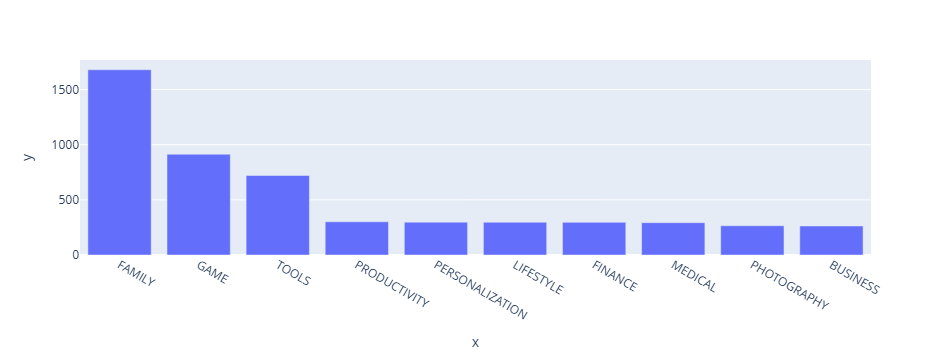

In [75]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
bar.show()

The **Family** and **Game** categories have the most apps, making them highly competitive.

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)
To analyze category popularity based on installs:

In [76]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

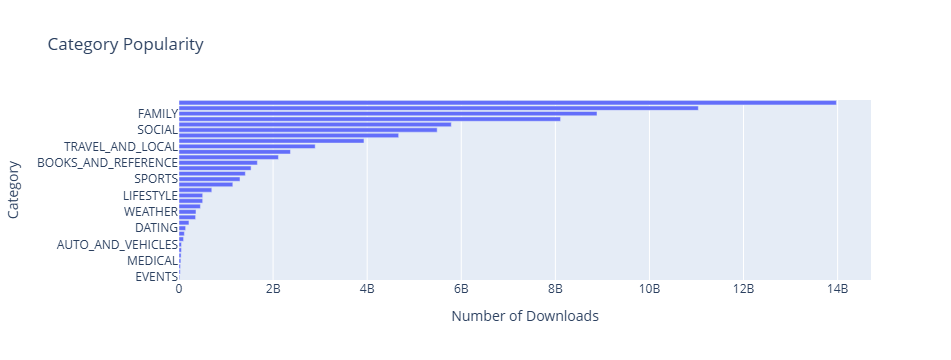

In [77]:
# Horizontal bar chart visualization:
h_bar = px.bar(
x = category_installs.Installs,
y = category_installs.index,
orientation='h',
title='Category Popularity'
)
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

Here, **Family** and **Social** stand out as the most downloaded (popular) categories.

---

### Category Concentration - Downloads vs. Competition (Scatter Plot — Popularity & Competitiveness)
**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

In [79]:
df_apps_installs_category = df_apps_clean[["App", "Installs", "Category"]].groupby('Category').agg({"App": "count", "Installs": "sum"})
df_apps_installs_category.head()

,App,Installs
Category,,
ART_AND_DESIGN,61,114233100
AUTO_AND_VEHICLES,73,53129800
BEAUTY,42,26916200
BOOKS_AND_REFERENCE,169,1665791655
BUSINESS,263,697018120


* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html) to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png width="400">

*Hint*: Use the size, `hover_name` and `color` parameters in `.scatter()`.\
To scale the yaxis, call `.update_layout()` and specify that the yaxis should be on a log-scale like so: `yaxis=dict(type='log')` 

- `size` emphasizes categories with the most downloads
- `color` helps distinguish categories visually
- `hover_name` enables interactive exploration
- Setting the y-axis to log scale helps spread out data for heavily skewed install numbers


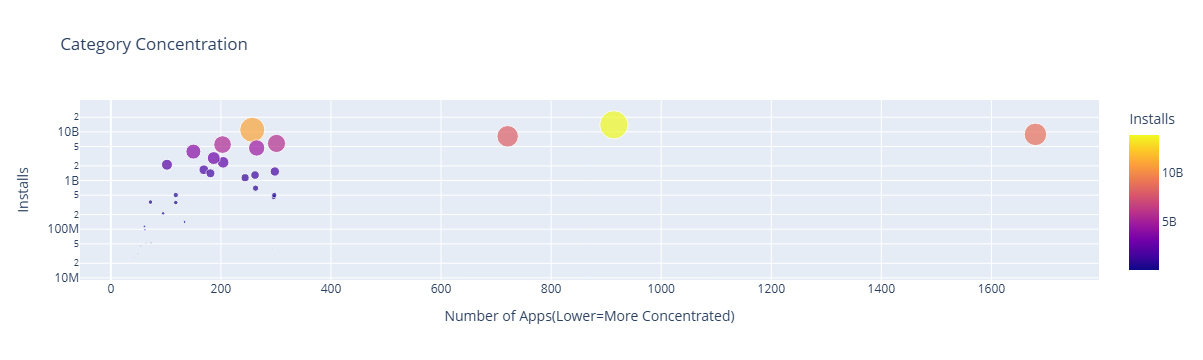

In [94]:
# scatter plot visualization:
h_bar = px.scatter(
    data_frame=df_apps_installs_category,
    x = 'App',
    y = 'Installs',
    size='Installs',
    hover_name=df_apps_installs_category.index, # Category which is index
    color='Installs',
    title='Category Concentration'
)
h_bar.update_layout(xaxis_title='Number of Apps(Lower=More Concentrated)', yaxis_title='Installs', yaxis=dict(type='log'))
h_bar.show()

What we see is that the categories like Family, Tools, and Game have many different apps sharing a high number of downloads. But for the categories like video players and entertainment, all the downloads are concentrated in very few apps.

# Dealing with Nested Data from a Particular Column
The **Genres** column is more granular than the categories column and often contains multiple genres for a single app, separated by a semicolon (;).
## Counting Genres and Handling Nested Data
### Challenge: 
- How many different types of genres are there?
- Can an app belong to more than one genre?
- Check what happens when you use `.value_counts()` on a column with nested values?
- See if you can work around this problem by using the `.split()` function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 

### Solution: Working with Nested Column Data

In [107]:
# number of genres
df_apps_clean.Genres.nunique()

115

In [97]:
# How many different genres
df_apps_clean.Genres.value_counts()

Genres
Tools                       720
Entertainment               485
Education                   438
Productivity                301
Personalization             298
                           ... 
Casual;Music & Video          1
Tools;Education               1
Role Playing;Brain Games      1
Adventure;Education           1
Lifestyle;Pretend Play        1
Name: count, Length: 115, dtype: int64

**As we can see that an app can belong to more than one genres**\
Let's split them 

 Select the 'Genres' column from the DataFrame
 This column is assumed to contain strings with multiple genres separated by a semicolon.
 Example: 'Action;Adventure;RPG'

In [111]:
genres_series = df_apps_clean.Genres

 Split the strings in the 'Genres' column by the semicolon delimiter.
 The `expand=True` argument is key here: it turns the split lists into a new DataFrame,
 with each part of the split string getting its own column.
 For example, 'Action;Adventure' becomes a row with two columns: ['Action', 'Adventure'].

In [112]:
split_genres = genres_series.str.split(';', expand=True)

 Use the `stack()` method to transform the new, multi-column DataFrame into a single Series.
 This operation effectively takes the 'tall' format (multiple columns) and makes it a 'long' format (single column),
 creating a new row for each individual genre.
 This is a crucial step for data cleaning and preparing the data for analysis, as it allows you to easily
 count the frequency of each individual genre.

In [113]:
stack = split_genres.stack()

In [114]:
stack.nunique()

53

In [116]:
stack.value_counts()

Tools                      721
Education                  607
Entertainment              521
Action                     306
Productivity               301
Personalization            298
Lifestyle                  298
Finance                    296
Medical                    293
Sports                     272
Photography                265
Business                   263
Communication              258
Health & Fitness           246
Casual                     226
Simulation                 207
News & Magazines           204
Social                     203
Travel & Local             187
Arcade                     186
Shopping                   181
Books & Reference          171
Video Players & Editors    153
Dating                     134
Puzzle                     127
Maps & Navigation          118
Role Playing               114
Racing                     103
Action & Adventure         102
Strategy                   100
Food & Drink                95
Educational                 93
Adventur

## Plotting: Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the `color_continuous_scale` parameter. 
* Find a way to make the color axis disappear by using `coloraxis_showscale`.

### Method 1: Bar plot

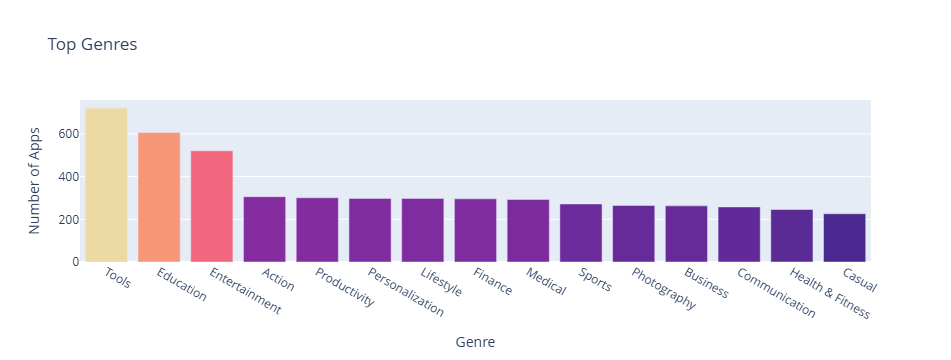

In [127]:
# method two: 
num_genres = stack.value_counts()
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

- `color_continuous_scale` changes the palette: try options like 'Viridis', 'Plasma', 'Agsunset', etc.
- `coloraxis_showscale=False` removes the color axis legend for a clean display.
### Method 2: Bar plot

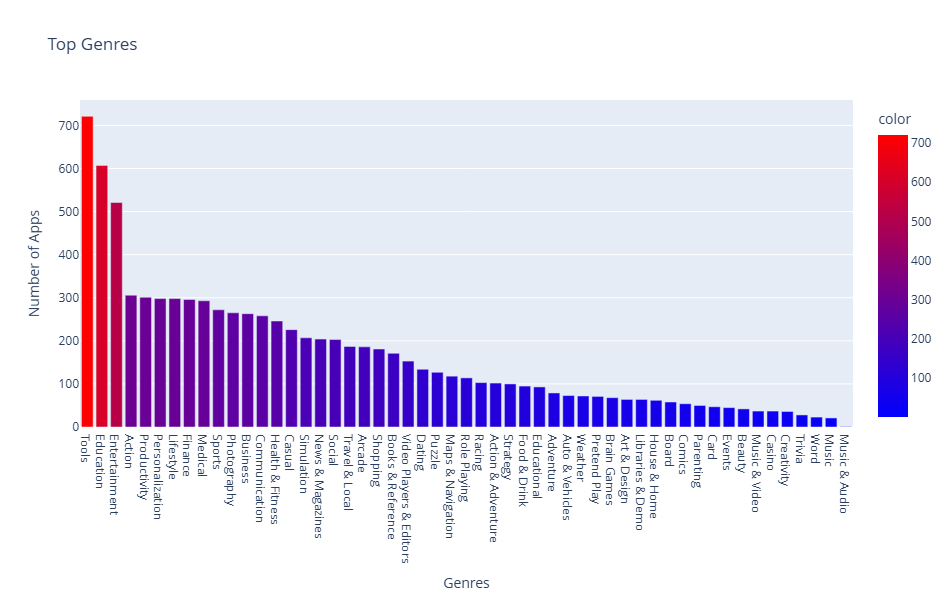

In [132]:
h_bar = px.bar(
    x = stack.value_counts().index,
    y = stack.value_counts().values,
    color=stack.value_counts().values,
    title='Top Genres',
     color_continuous_scale='Bluered'
)
h_bar.update_layout(xaxis_title='Genres', yaxis_title='Number of Apps', height=600)
h_bar.show()

# Grouped Bar Charts and Box Plots with Plotly

## Free vs Paid Apps by Category

The majority of Google Play Store apps are free:

In [166]:
df_apps_clean.Type.value_counts()

Type
Free    7684
Paid     591
Name: count, dtype: int64


To explore how different categories split between free and paid apps, group by **Category** and **Type**, counting apps per group:



In [161]:
df_apps_type_category = df_apps_clean.groupby(['Category', 'Type'], as_index=False).agg({'App': "count"})
df_apps_type_category.sort_values(by='App', ascending=False, inplace=True)
df_apps_type_category.head()

,Category,Type,App
19,FAMILY,Free,1528
25,GAME,Free,838
53,TOOLS,Free,658
21,FINANCE,Free,289
31,LIFESTYLE,Free,284


**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png width='500'>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

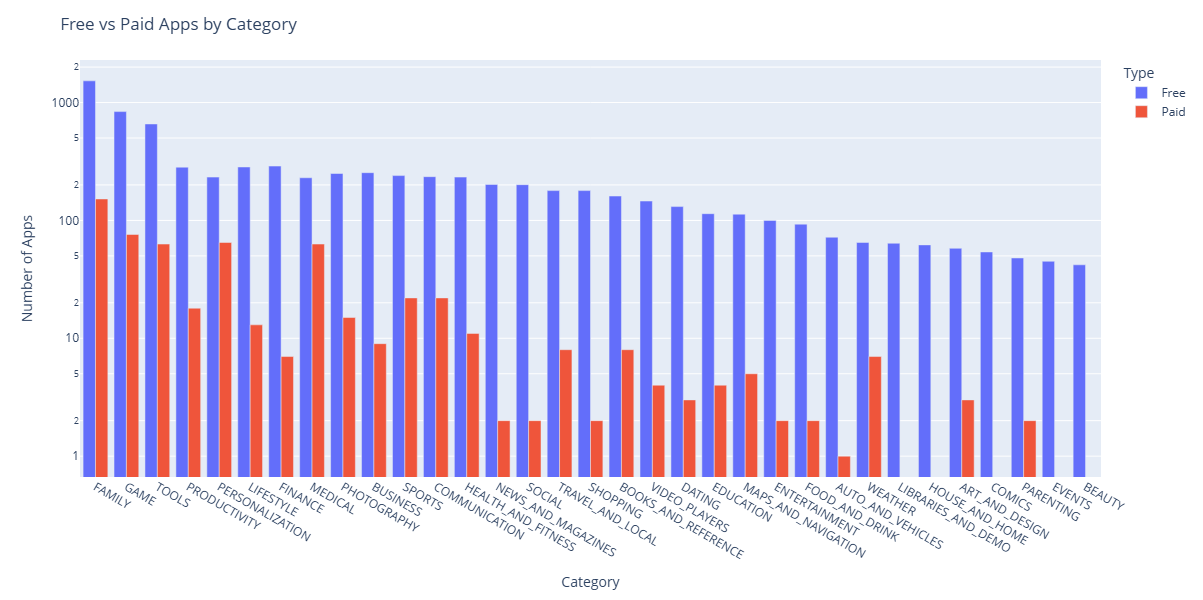

In [177]:
fig = px.bar(
    df_apps_type_category,
    x="Category",
    y='App',
    color='Type',
    barmode='group'
)

fig.update_layout(title='Free vs Paid Apps by Category',
                  xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  height=600,
                  xaxis={'categoryorder':'total descending'}, # Order by 
                  yaxis=dict(type='log'))
fig.show()


- Some categories like **Personalization, Medical**, and **Weather** have relatively more paid apps.
- Depending on your category, releasing a paid app might make sense.
But this leads to many more questions:

- How much should you charge? What are other apps charging in that category?
- How much revenue could you make?
- And how many downloads are you potentially giving up because your app is paid?

Let’s try and answer these questions with some `Box plots`. Box plots show us some handy descriptive statistics in a graph - things like the median value, the maximum value, the minimum value, and some quartiles. Here’s what we’re after:

---

## Box Plot: Number of Installs for Free vs Paid Apps (Lost Downloads for Paid Apps)

Box plots can show distribution differences between free and paid apps in terms of installs:

**Challenge**: 
- Create a box plot that shows the number of Installs for free versus paid apps.
-  How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png width='500'>


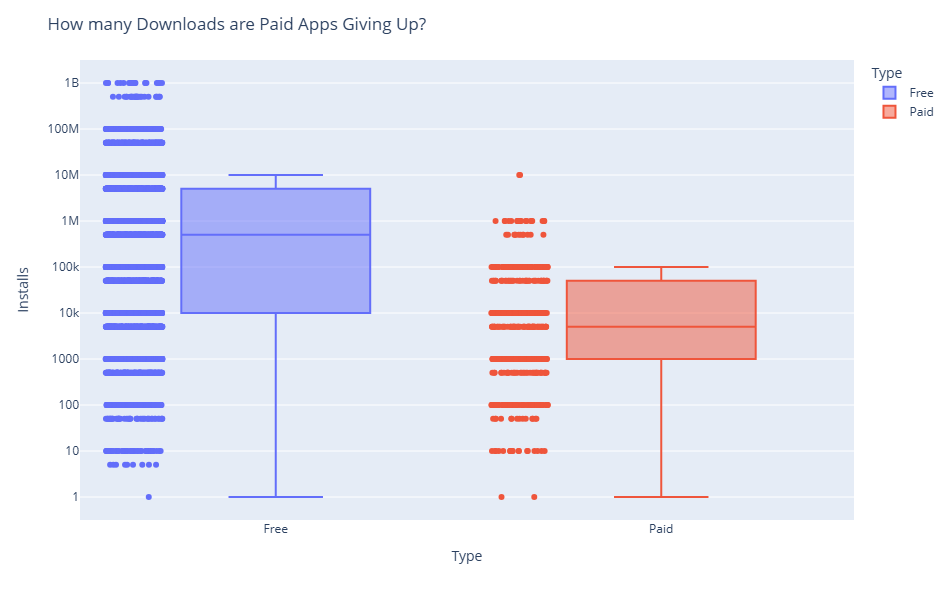

In [170]:
fig = px.box(df_apps_clean, x="Type", y="Installs", points="all", color='Type')
fig.update_layout(title='How many Downloads are Paid Apps Giving Up?',
                  xaxis_title='Type',
                  yaxis_title='Installs',
                  height=600,
                 yaxis=dict(type='log') # Log scale to handle large variances
                 )
fig.show()

- Median installs for **free apps** are around **500,000**.
- Median installs for **paid apps** drop drastically to around **5,000**.
- 🤔 But does this mean we should give up on selling a paid app? Let’s see how much revenue we would estimate per category.
---

## Box Plot: Estimated Revenue by Category for Paid Apps (Revenue by App Category)

Calculate estimated revenue and examine distribution by categories for paid apps:


**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png width='500'>

Looking at the hover text, how much does the median app earn in the Tools category? [If developing an Android app costs $30,000 or thereabouts](http://howmuchtomakeanapp.com/), does the average photography app recoup its development costs?

Hint: I've used `min ascending` to sort the categories. 

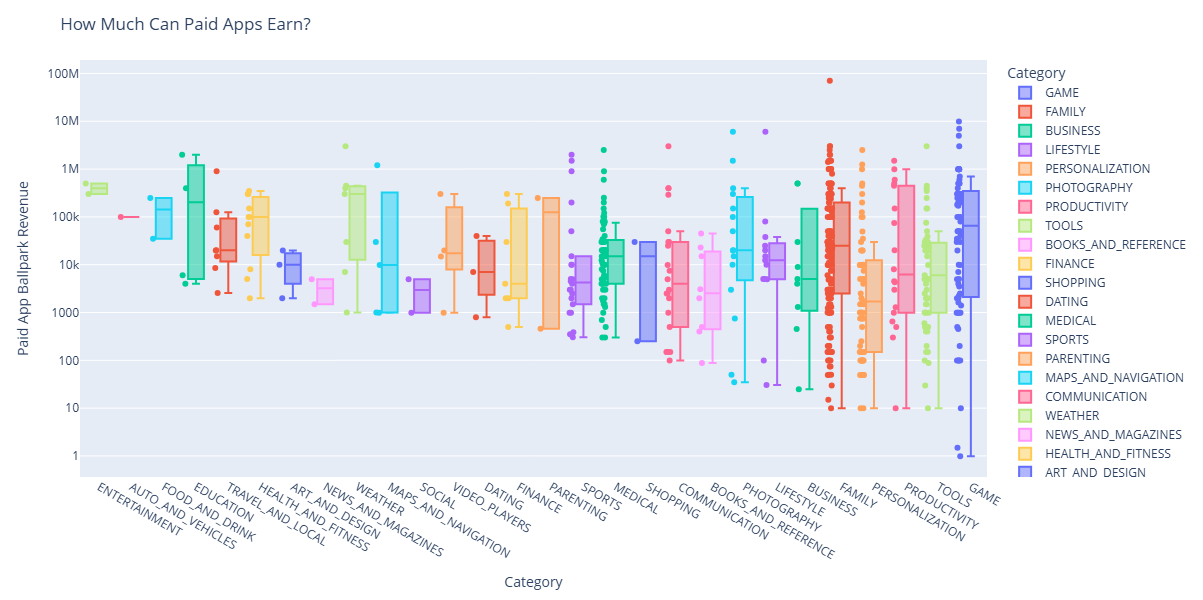

In [179]:
fig = px.box(df_apps_clean[df_apps_clean.Type == 'Paid'], x="Category", y="Revenue_Estimate", points="all", color='Category')

fig.update_layout(title='How Much Can Paid Apps Earn?',
                  xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  height=600,
                  yaxis=dict(type='log'), # Log scale to handle large variances
                  xaxis={'categoryorder':'min descending'}  # Order by minimum revenue ascending
                 )
fig.show()


- Median paid apps rarely cover the $30,000 development cost.
- Categories like **Medical, Personalization, Tools, Game, Family** have outliers with much higher revenues.
- Helps decide pricing strategy based on category revenue potential.
So, if you were to list a paid app, how should you price it? To help you decide we can look at how your competitors in the same category price their apps.

---

## Box Plot: Price Distribution by Category for Paid Apps (How Much Can You Charge? Examine Paid App Pricing Strategies by Category)

Examine pricing patterns across categories:

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [182]:
# AThe median price for an Android app is'
df_apps_clean[df_apps_clean.Type == "Paid"].Price.median()

np.float64(2.99)

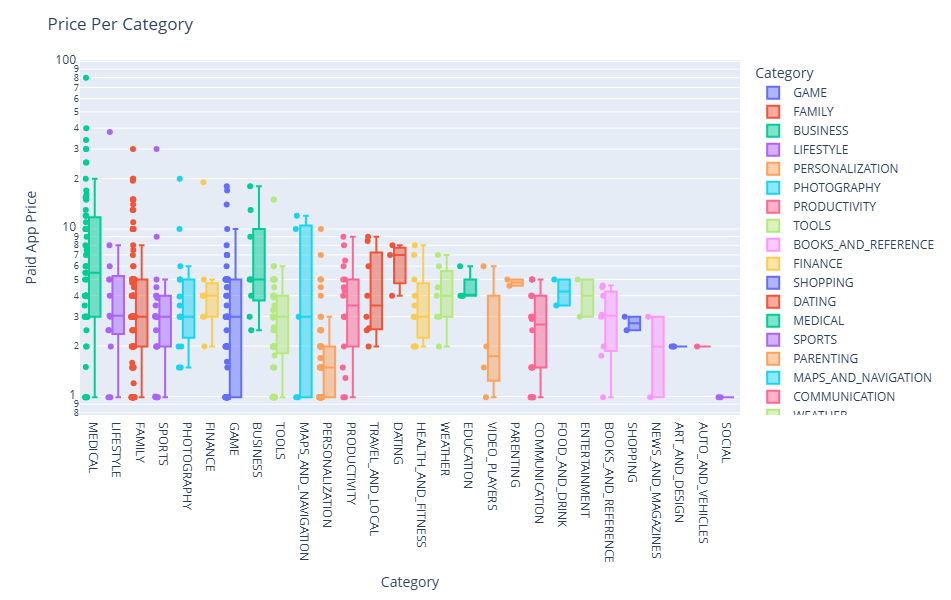

In [184]:
fig = px.box(
    df_apps_clean[df_apps_clean.Type == 'Paid'],
    x="Category",
    y="Price",
    points="all",
    color='Category')

fig.update_layout(title='Price Per Category',
                  xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  height=600,
                  yaxis=dict(type='log'), # Log scale to handle large variances
                  xaxis={'categoryorder':'max descending'}  # Sort categories by max price descending
                 )
fig.show()


- Median Android paid app price is **\\$2.99**.
- **Medical** apps have the highest median price (~\\$5.49).
- **Personalization** is cheaper (~\\$1.49).
- Other costly categories include Business (\\$4.99) and Dating ($6.99).
- Suggests customers in some categories are willing to pay more for apps.

---
